In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

# First Model

In [21]:
df = pd.read_csv('../data/dataset.csv')

In [22]:
df

,Time,Compound,Close,Volume,FundingRate,Bitcoin_SVI,Cryptocurrency_SVI,No. of Active Addresses,No. of Unique Addresses,Transactions,Close_mean,Close_std
0,2020-03-04 00:00:00,0.339160,8750.7,1.221924e+07,0.010000,8.64,4.34,857423,625096.0,358745.0,NaN,NaN
1,2020-03-05 00:00:00,0.339160,9056.9,1.521845e+07,0.016667,9.26,3.76,793221,603996.0,349529.0,8750.700000,NaN
2,2020-03-06 00:00:00,0.339160,9134.3,8.833555e+06,0.020000,8.95,3.33,804945,601698.0,338383.0,8903.800000,216.516096
3,2020-03-07 00:00:00,0.339160,8889.9,7.525135e+06,0.036667,7.10,3.04,682432,526880.0,313312.0,8980.633333,202.853872
4,2020-03-08 00:00:00,0.339160,8036.5,1.439716e+07,0.043333,8.02,4.34,654911,501571.0,302694.0,9027.033333,124.907379
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2022-02-27 00:00:00,0.106867,37706.7,3.883689e+08,0.006667,12.96,21.07,768705,583361.0,211164.0,38886.533333,492.423459
726,2022-02-28 00:00:00,0.135383,43179.8,5.641211e+08,-0.010000,16.20,24.83,981066,702483.0,270918.0,38681.800000,845.955123
727,2022-03-01 00:00:00,0.006329,44428.2,4.448582e+08,0.003333,17.67,29.34,1065354,722863.0,280634.0,40001.866667,2841.331315
728,2022-03-02 00:00:00,0.068437,43896.9,3.404605e+08,0.003333,15.61,26.33,1091796,731603.0,288657.0,41771.566667,3575.189702


In [8]:
df.shape

(730, 12)

In [9]:
df = df['Close'].values
df = df.reshape(-1, 1)

In [10]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [12]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [13]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
17/17 [==============================] - 8s 108ms/step - loss: 0.0657
Epoch 2/50
17/17 [==============================] - 2s 104ms/step - loss: 0.0179
Epoch 3/50
17/17 [==============================] - 2s 111ms/step - loss: 0.0099
Epoch 4/50
17/17 [==============================] - 3s 156ms/step - loss: 0.0086
Epoch 5/50
17/17 [==============================] - 3s 161ms/step - loss: 0.0075
Epoch 6/50
17/17 [==============================] - 3s 150ms/step - loss: 0.0076
Epoch 7/50
17/17 [==============================] - 2s 123ms/step - loss: 0.0078
Epoch 8/50
17/17 [==============================] - 2s 133ms/step - loss: 0.0075
Epoch 9/50
17/17 [==============================] - 2s 114ms/step - loss: 0.0069
Epoch 10/50
17/17 [==============================] - 2s 135ms/step - loss: 0.0076
Epoch 11/50
17/17 [==============================] - 2s 118ms/step - loss: 0.0066
Epoch 12/50
17/17 [==============================] - 2s 144ms/step - loss: 0.0061
Epoch 13/50
17/17 [======

In [19]:
model = load_model('stock_prediction.h5')

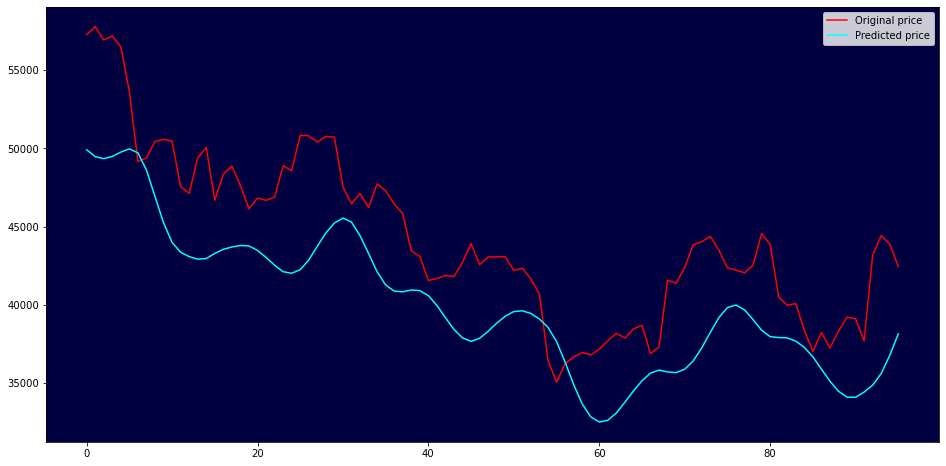

In [20]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [41]:
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(y_test_scaled-predictions)/y_test_scaled)).mean())

Accuracy: 95.69767208261473


# Second Model

In [16]:
df = pd.read_csv('../data/dataset.csv')
df_time = df['Time']
# df = df.drop(columns = ['Time'])
# df

<AxesSubplot:xlabel='Time'>

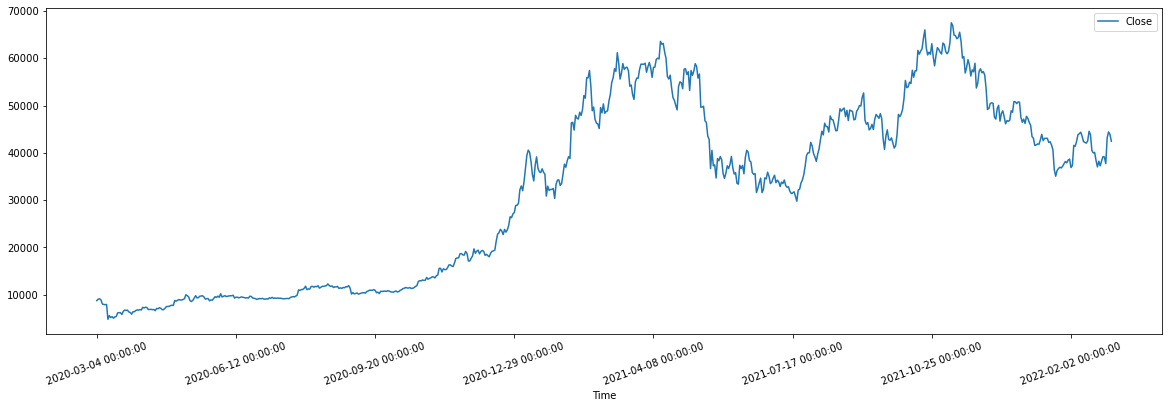

In [17]:
# Plotting the stock prices
df.plot(x='Time', y='Close', kind='line', figsize=(20,6), rot=20)

In [18]:
# Extracting the closing prices of each day
FullData=df[['Close']].values
print(FullData[0:5])
 
# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()
 
DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData
 
print('### After Normalization ###')
X[0:5]

[[8750.7]
 [9056.9]
 [9134.3]
 [8889.9]
 [8036.5]]
### After Normalization ###


array([[0.06295669],
       [0.06783975],
       [0.06907407],
       [0.06517655],
       [0.05156714]])

In [19]:
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=5  # next day's Price Prediction is based on last how many past day's prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(725, 5, 1)

#### Output Data shape ####
(725, 1)


In [20]:
# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

############################################

# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)

# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
############################################
 
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(720, 5, 1)
(720, 1)

#### Testing Data shape ####
(5, 5, 1)
(5, 1)

#### Training Data shape ####
(720, 5, 1)
(720, 1)

#### Testing Data shape ####
(5, 5, 1)
(5, 1)


In [21]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.06295669]
 [0.06783975]
 [0.06907407]
 [0.06517655]
 [0.05156714]] -- [0.04988949]
[[0.06783975]
 [0.06907407]
 [0.06517655]
 [0.05156714]
 [0.04988949]] -- [0.04931538]


In [22]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 5
Number of Features: 1


In [23]:
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
regressor.add(Dense(units = 1))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)
 
EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/100
144/144 [==============================] - 2s 3ms/step - loss: 0.1551
Epoch 2/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 3/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 4/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 5/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 6/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 8/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 9/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 10/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 11/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 12/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 13/100


144/144 [==============================] - 0s 3ms/step - loss: 8.0896e-04
Epoch 99/100
144/144 [==============================] - 0s 3ms/step - loss: 8.0876e-04
Epoch 100/100
144/144 [==============================] - 0s 3ms/step - loss: 8.2534e-04
## Total Time Taken:  1 Minutes ##


Accuracy: 93.74479666650066


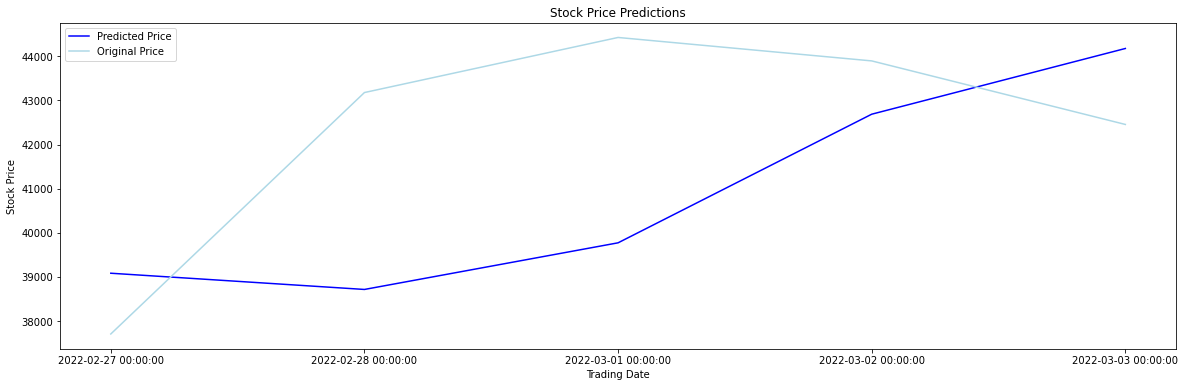

In [24]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
 
plt.plot(predicted_Price, color = 'blue', label = 'Predicted Price')
plt.plot(orig, color = 'lightblue', label = 'Original Price')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), df.tail(TestingRecords)['Time'])
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

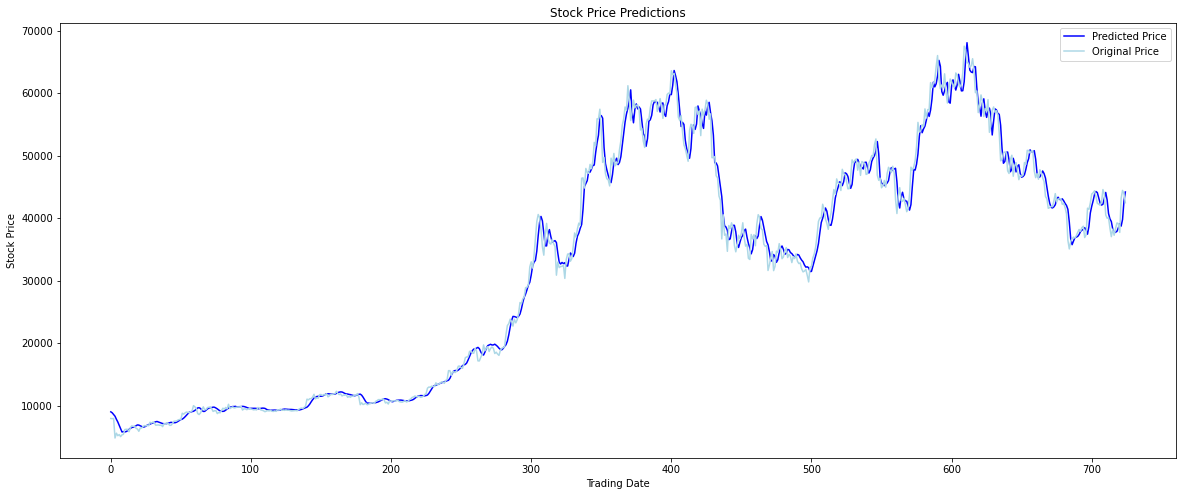

In [25]:
# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]
 
# plotting the full data
plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')
 
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

# Third Model

In [26]:
df = pd.read_csv('../data/dataset.csv')

In [27]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isna().values.any())

Dataframe Shape:  (730, 12)
Null Value Present:  True


In [28]:
# Count missing value
print(df.isna().sum())

Time                       0
Compound                   0
Close                      0
Volume                     0
FundingRate                0
Bitcoin_SVI                0
Cryptocurrency_SVI         0
No. of Active Addresses    0
No. of Unique Addresses    2
Transactions               0
Close_mean                 1
Close_std                  2
dtype: int64


<AxesSubplot:xlabel='Time'>

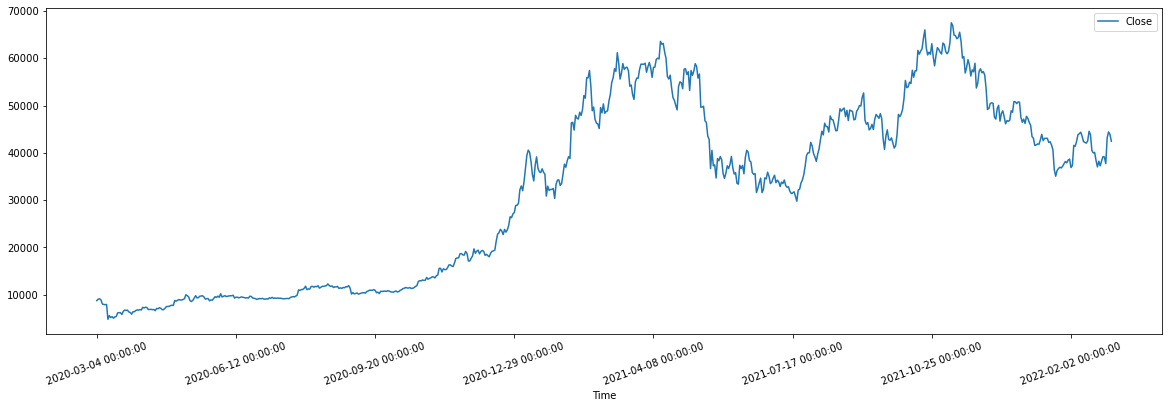

In [29]:
# Plotting the stock prices
df.plot(x='Time', y='Close', kind='line', figsize=(20,6), rot=20)

In [30]:
#Set Target Variable
output_var = pd.DataFrame(df["Close"])
#Selecting the Features
features = ["Compound", "Volume", "FundingRate", "Bitcoin_SVI", "Cryptocurrency_SVI", \
           "No. of Active Addresses", "No. of Unique Addresses", "Transactions"]
# time_var = output_var = pd.DataFrame(df["Time"])

In [31]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Compound,Volume,FundingRate,Bitcoin_SVI,Cryptocurrency_SVI,No. of Active Addresses,No. of Unique Addresses,Transactions
0,0.6616,0.006956,0.406593,0.070506,0.040714,0.399875,0.429122,0.844827
1,0.6616,0.010453,0.428571,0.076814,0.034898,0.324190,0.392319,0.811569
2,0.6616,0.003008,0.439560,0.073660,0.030586,0.338011,0.388311,0.771346
3,0.6616,0.001482,0.494505,0.054838,0.027677,0.193585,0.257815,0.680871
4,0.6616,0.009495,0.516484,0.064198,0.040714,0.161141,0.213671,0.642553


In [32]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [33]:
from sklearn.impute import KNNImputer

KNN_miss_filling = KNNImputer(n_neighbors=2).fit(X_train)
X_train = pd.DataFrame(KNN_miss_filling.transform(X_train))

In [34]:
# Count missing value
print(X_train.isna().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [35]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [36]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [37]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
83/83 [==============================] - 1s 1ms/step - loss: 1344722048.0000
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 1344643200.0000
Epoch 3/100
83/83 [==============================] - 0s 994us/step - loss: 1344460416.0000
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 1344139520.0000
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 1343683968.0000
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 1343114112.0000
Epoch 7/100
83/83 [==============================] - 0s 997us/step - loss: 1342450560.0000
Epoch 8/100
83/83 [==============================] - 0s 974us/step - loss: 1341706240.0000
Epoch 9/100
83/83 [==============================] - 0s 973us/step - loss: 1340889600.0000
Epoch 10/100
83/83 [==============================] - 0s 976us/step - loss: 1340005120.0000
Epoch 11/100
83/83 [==============================] - 0s 979us/step - loss: 1339057152.0000
Epoch 1

In [38]:
#LSTM Prediction
y_pred = lstm.predict(X_test)

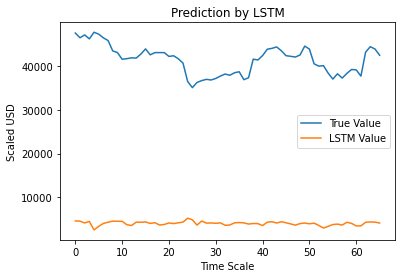

In [39]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title("Prediction by LSTM")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [40]:
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(y_test-y_pred)/y_test)).mean())

Accuracy: 9.797959624738539


# Fourth Model

In [125]:
df = pd.read_csv('../data/dataset.csv')

In [126]:
df1 = df['Close']

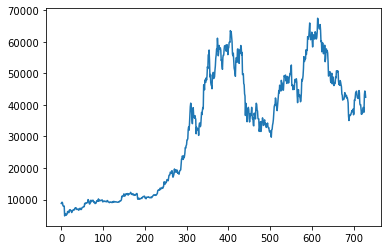

In [127]:
plt.plot(df1)

In [128]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [129]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [130]:
training_size,test_size

(510, 220)

In [131]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [132]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [133]:
print(X_train.shape), print(y_train.shape)

(409, 100)
(409,)


(None, None)

In [134]:
print(X_test.shape), print(ytest.shape)

(119, 100)
(119,)


(None, None)

In [135]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [136]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [137]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [138]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_18 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_19 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_18 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_19 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
7/7 [==============================] - 6s 255ms/step - loss: 0.0989 - val_loss: 0.0492
Epoch 2/100
7/7 [==============================] - 1s 97ms/step - loss: 0.0176 - val_loss: 0.0321
Epoch 3/100
7/7 [==============================] - 1s 97ms/step - loss: 0.0147 - val_loss: 0.0053
Epoch 4/100
7/7 [==============================] - 1s 97ms/step - loss: 0.0089 - val_loss: 0.0050
Epoch 5/100
7/7 [==============================] - 1s 97ms/step - loss: 0.0063 - val_loss: 0.0040
Epoch 6/100
7/7 [==============================] - 1s 98ms/step - loss: 0.0053 - val_loss: 0.0082
Epoch 7/100
7/7 [==============================] - 1s 98ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 8/100
7/7 [==============================] - 1s 99ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 9/100
7/7 [==============================] - 1s 97ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 10/100
7/7 [==============================] - 1s 98ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 11/100
7/7 [

In [141]:
import tensorflow as tf

In [142]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [143]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [144]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

33543.8411781564

In [145]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

47085.46441652847

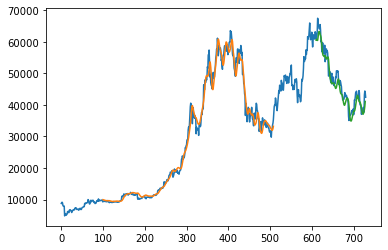

In [146]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [147]:
length = len(test_data) - 100
x_input=test_data[length:].reshape(1,-1)
x_input.shape

(1, 100)

In [148]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [149]:
x_input

array([[0.8345852 , 0.86353749, 0.78014754, 0.79595768, 0.83679549,
        0.84479943, 0.8312554 , 0.83539213, 0.82418278, 0.77866604,
        0.70747896, 0.71117235, 0.7278261 , 0.73005712, 0.72822319,
        0.68167785, 0.67509321, 0.71106869, 0.72164971, 0.668078  ,
        0.69454093, 0.70280481, 0.68288984, 0.65931497, 0.67014317,
        0.66780211, 0.67130414, 0.70309186, 0.69816255, 0.73411252,
        0.73362772, 0.72724402, 0.73307435, 0.73218449, 0.6816013 ,
        0.66441969, 0.67488111, 0.66043287, 0.68454836, 0.67758258,
        0.66405291, 0.65431868, 0.61642475, 0.61051309, 0.58619826,
        0.58809758, 0.59124079, 0.59026323, 0.60490762, 0.62376209,
        0.60227632, 0.61021328, 0.61032013, 0.6102978 , 0.59641728,
        0.59876153, 0.58786635, 0.57223801, 0.50476345, 0.48258716,
        0.50155327, 0.50827983, 0.51276899, 0.51045504, 0.51611633,
        0.5248682 , 0.53226774, 0.52756807, 0.53685577, 0.54046145,
        0.51160484, 0.5185738 , 0.5864901 , 0.58

In [150]:
# demonstrate prediction for next 14 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<14):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.62490463]
101
1 day input [0.86353749 0.78014754 0.79595768 0.83679549 0.84479943 0.8312554
 0.83539213 0.82418278 0.77866604 0.70747896 0.71117235 0.7278261
 0.73005712 0.72822319 0.68167785 0.67509321 0.71106869 0.72164971
 0.668078   0.69454093 0.70280481 0.68288984 0.65931497 0.67014317
 0.66780211 0.67130414 0.70309186 0.69816255 0.73411252 0.73362772
 0.72724402 0.73307435 0.73218449 0.6816013  0.66441969 0.67488111
 0.66043287 0.68454836 0.67758258 0.66405291 0.65431868 0.61642475
 0.61051309 0.58619826 0.58809758 0.59124079 0.59026323 0.60490762
 0.62376209 0.60227632 0.61021328 0.61032013 0.6102978  0.59641728
 0.59876153 0.58786635 0.57223801 0.50476345 0.48258716 0.50155327
 0.50827983 0.51276899 0.51045504 0.51611633 0.5248682  0.53226774
 0.52756807 0.53685577 0.54046145 0.51160484 0.5185738  0.5864901
 0.58341387 0.59948873 0.62262665 0.62576826 0.63106435 0.61704031
 0.59909483 0.59673942 0.59409217 0.60171338 0.63407361 0.62299024
 0.56938664 0.56092341 0.5626808  0.

10 day output [[0.65929574]]
11 day input [0.71117235 0.7278261  0.73005712 0.72822319 0.68167785 0.67509321
 0.71106869 0.72164971 0.668078   0.69454093 0.70280481 0.68288984
 0.65931497 0.67014317 0.66780211 0.67130414 0.70309186 0.69816255
 0.73411252 0.73362772 0.72724402 0.73307435 0.73218449 0.6816013
 0.66441969 0.67488111 0.66043287 0.68454836 0.67758258 0.66405291
 0.65431868 0.61642475 0.61051309 0.58619826 0.58809758 0.59124079
 0.59026323 0.60490762 0.62376209 0.60227632 0.61021328 0.61032013
 0.6102978  0.59641728 0.59876153 0.58786635 0.57223801 0.50476345
 0.48258716 0.50155327 0.50827983 0.51276899 0.51045504 0.51611633
 0.5248682  0.53226774 0.52756807 0.53685577 0.54046145 0.51160484
 0.5185738  0.5864901  0.58341387 0.59948873 0.62262665 0.62576826
 0.63106435 0.61704031 0.59909483 0.59673942 0.59409217 0.60171338
 0.63407361 0.62299024 0.56938664 0.56092341 0.5626808  0.53546357
 0.51386616 0.5330651  0.51741284 0.53452109 0.54885291 0.54725021
 0.52472626 0.6120073

In [151]:
day_new=np.arange(1,101)
day_pred=np.arange(101,115)

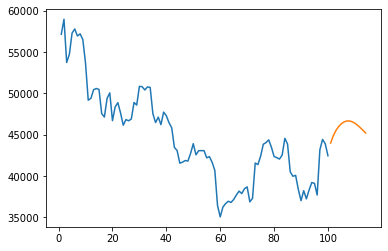

In [152]:
length = len(df1) - 100
plt.plot(day_new,scaler.inverse_transform(df1[630:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

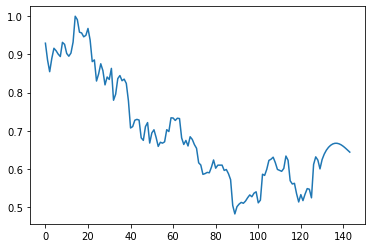

In [153]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[600:])

In [11]:
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns

In [12]:
df = pd.read_csv('../data/dataset.csv')

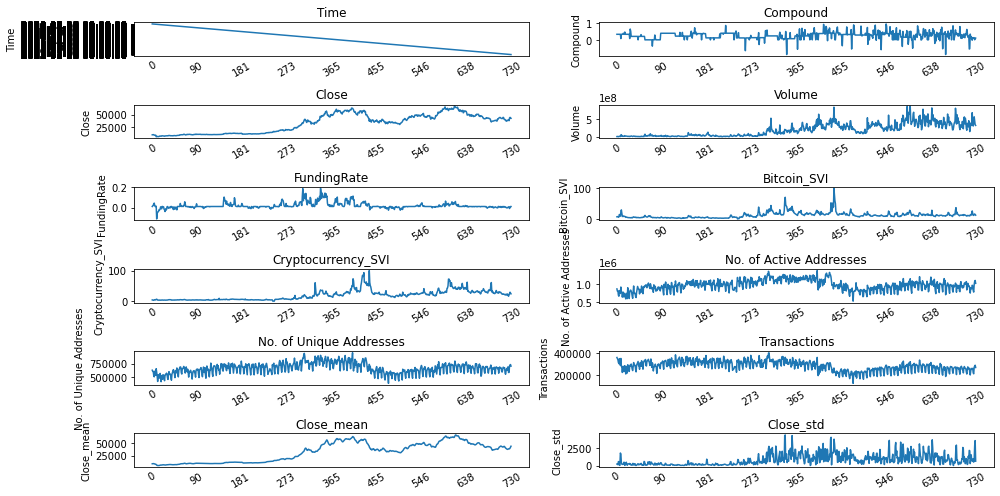

In [26]:
import seaborn as sns
df_plot = df.copy()

list_length = df_plot.shape[1]
ncols = 2
nrows = int(round(list_length / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        ax = plt.subplot(nrows,ncols,i+1)
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.set_title(df_plot.columns[i])
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

In [13]:
print(df.isna().sum())

Time                       0
Compound                   0
Close                      0
Volume                     0
FundingRate                0
Bitcoin_SVI                0
Cryptocurrency_SVI         0
No. of Active Addresses    0
No. of Unique Addresses    2
Transactions               0
Close_mean                 1
Close_std                  2
dtype: int64


In [29]:
df = df.dropna()
df.shape

(726, 12)

In [31]:
df['Time']

2      2020-03-06 00:00:00
3      2020-03-07 00:00:00
4      2020-03-08 00:00:00
5      2020-03-09 00:00:00
6      2020-03-10 00:00:00
              ...         
725    2022-02-27 00:00:00
726    2022-02-28 00:00:00
727    2022-03-01 00:00:00
728    2022-03-02 00:00:00
729    2022-03-03 00:00:00
Name: Time, Length: 726, dtype: object

In [15]:
FEATURES = ["Compound", "Volume", "FundingRate", "Bitcoin_SVI", "Cryptocurrency_SVI", \
           "No. of Active Addresses", "No. of Unique Addresses", "Transactions", "Close"]
# time_var = output_var = pd.DataFrame(df["Time"])

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['Compound', 'Volume', 'FundingRate', 'Bitcoin_SVI', 'Cryptocurrency_SVI', 'No. of Active Addresses', 'No. of Unique Addresses', 'Transactions', 'Close']


,Compound,Volume,FundingRate,Bitcoin_SVI,Cryptocurrency_SVI,No. of Active Addresses,No. of Unique Addresses,Transactions,Close,Prediction
725,0.106867,388368905.7,0.006667,12.96,21.07,768705,583361.0,211164.0,37706.7,37706.7
726,0.135383,564121052.5,-0.010000,16.20,24.83,981066,702483.0,270918.0,43179.8,43179.8
727,0.006329,444858241.2,0.003333,17.67,29.34,1065354,722863.0,280634.0,44428.2,44428.2
728,0.068437,340460526.5,0.003333,15.61,26.33,1091796,731603.0,288657.0,43896.9,43896.9
729,0.109327,324545814.8,0.010000,13.84,24.08,1011448,701198.0,268244.0,42456.3,42456.3


In [28]:
data_filtered.shape

(726, 9)

In [17]:
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(726, 9)


In [18]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(531, 50, 9) (531,)
(145, 50, 9) (145,)
0.26027397260273966
0.26027397260273966


In [19]:
x_train.shape[2]

9

In [20]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

450 50 9


In [21]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/50
34/34 [==============================] - 14s 295ms/step - loss: 0.0530 - val_loss: 0.0040
Epoch 2/50
34/34 [==============================] - 14s 419ms/step - loss: 0.0095 - val_loss: 0.0037
Epoch 3/50
34/34 [==============================] - 12s 365ms/step - loss: 0.0087 - val_loss: 0.0020
Epoch 4/50
34/34 [==============================] - 16s 487ms/step - loss: 0.0087 - val_loss: 0.0032
Epoch 5/50
34/34 [==============================] - 12s 355ms/step - loss: 0.0073 - val_loss: 0.0013
Epoch 6/50
34/34 [==============================] - 13s 387ms/step - loss: 0.0076 - val_loss: 0.0026
Epoch 7/50
34/34 [==============================] - 15s 442ms/step - loss: 0.0079 - val_loss: 0.0026
Epoch 8/50
34/34 [==============================] - 11s 328ms/step - loss: 0.0065 - val_loss: 0.0014
Epoch 9/50
34/34 [==============================] - 11s 326ms/step - loss: 0.0067 - val_loss: 0.0015
Epoch 10/50
34/34 [==============================] - 11s 321ms/step - loss: 0.0063 - val_lo

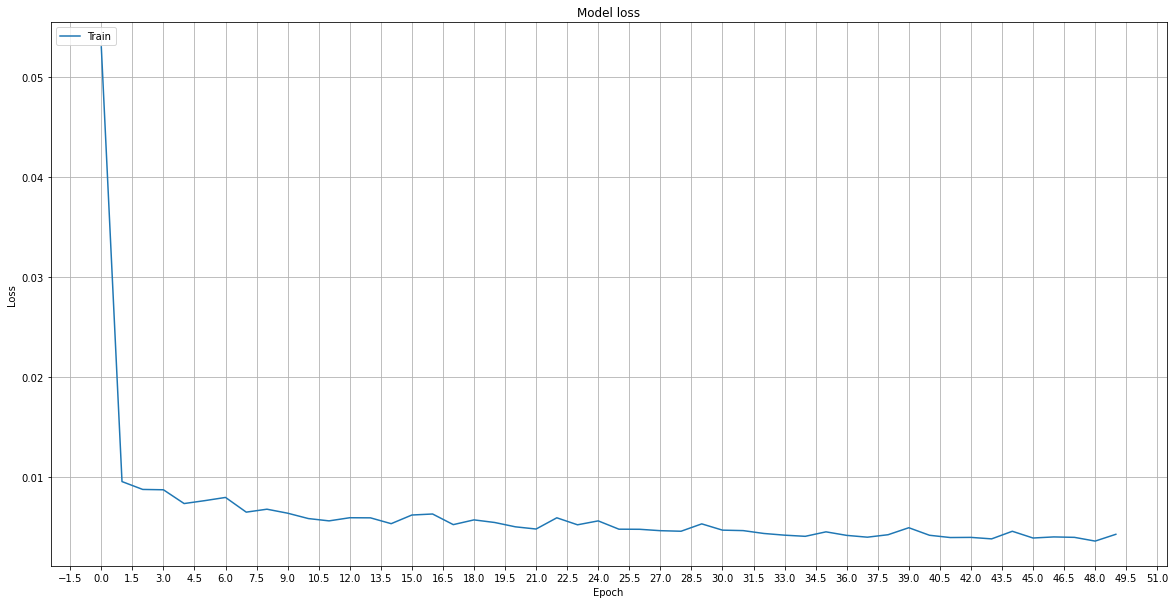

In [22]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [23]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 1837.94
Mean Absolute Percentage Error (MAPE): 8.59 %
Median Absolute Percentage Error (MDAPE): 6.83 %


In [41]:
xt

2      2020-03-06 00:00:00
3      2020-03-07 00:00:00
4      2020-03-08 00:00:00
5      2020-03-09 00:00:00
6      2020-03-10 00:00:00
              ...         
581    2021-10-06 00:00:00
582    2021-10-07 00:00:00
583    2021-10-08 00:00:00
584    2021-10-09 00:00:00
585    2021-10-10 00:00:00
Name: Date, Length: 582, dtype: object

In [42]:
xv

585    2021-10-10 00:00:00
586    2021-10-11 00:00:00
587    2021-10-12 00:00:00
588    2021-10-13 00:00:00
589    2021-10-14 00:00:00
              ...         
725    2022-02-27 00:00:00
726    2022-02-28 00:00:00
727    2022-03-01 00:00:00
728    2022-03-02 00:00:00
729    2022-03-03 00:00:00
Name: Date, Length: 145, dtype: object

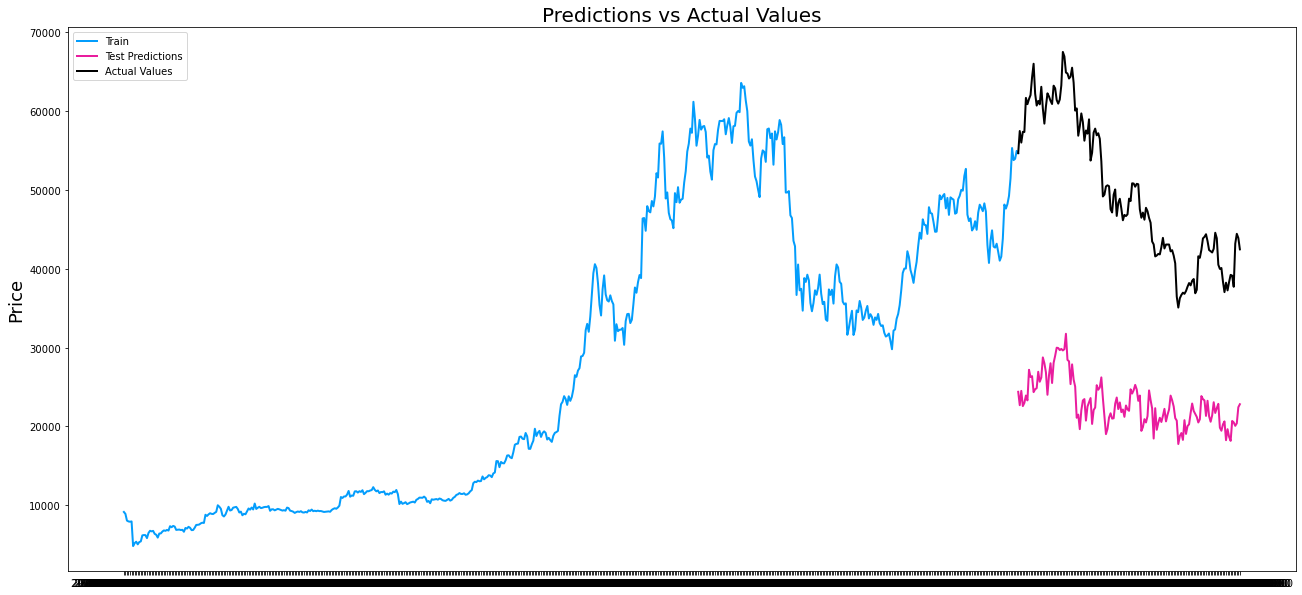

In [43]:
# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = df['Time']

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close"]]
xv = valid['Date']; yv = valid[["Close", "Prediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.ylabel('Price', fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

